## Plot FPR @ given TPR workpoints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read FPR @TPR data 
files = [ '/Users/sznajder/WorkM1/workdir/data/performance_MLP_nconst_8.csv',
          '/Users/sznajder/WorkM1/workdir/data/performance_GraphConv_nconst_8.csv',
          '/Users/sznajder/WorkM1/workdir/data/performance_EdgeGraphConv_nconst_8.csv',
          '/Users/sznajder/WorkM1/workdir/data/performance_InteractionNetwork_nconst_8.csv']
dfs = [ pd.read_csv(f) for f in files ]
data = pd.concat(dfs, ignore_index=True) 
print("header = ", data.keys())

header =  Index(['model', 'label', 'treshold', 'tpr', 'fpr'], dtype='object')


In [2]:
def plot(df,ax,t):
  labels = list( set( df['label'] ) )
  models = list( set( df['model'] ) )
  nmodels = len(models) 
  for m,model in enumerate(models):
    plt.gca().set_prop_cycle(None)
    for label in labels:
      if (m==0):
        ax.scatter( m , df['fpr'][ df['label']==label ][ df['model']==model ], marker='o',s=200,label=label)  
      else:
        ax.scatter( m , df['fpr'][ df['label']==label ][ df['model']==model ], marker='o',s=200)  


  ax.xaxis.set_ticks( np.arange(nmodels)  )
  ax.xaxis.set_ticklabels( models, rotation=90 )
  ax.legend(loc="upper right")
  plt.xlabel("model")
  plt.ylabel("FPR @ "+str(t)+" TPR")



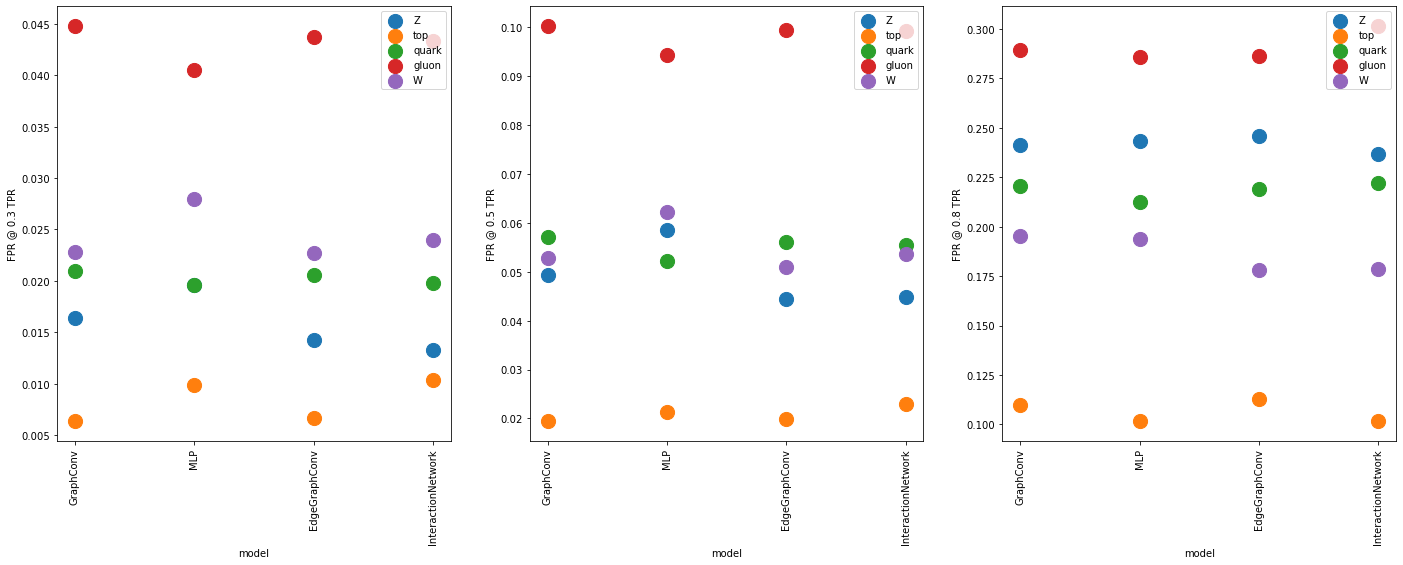

In [3]:
treshs  = list( set( data['treshold'] ) )
plt.figure(figsize=(24,8))
#fig, axx = plt.subplots()
for i,t in enumerate(treshs):
    dat = data[ data['treshold']==t ]
    ax = plt.subplot(1, 3, i+1)
    plot(dat,ax,t)